## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

Я посчитала руками: интеграл = 2/3

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [4]:
import numpy as np
def midpoint_rule(func, a, b, eps):
    N = 10
    h = (b - a) / N
    x_N = np.linspace(a, b, N+1)
    I_N = h * sum([func((x_N[i] + x_N[i+1]) / 2) for i in range(N)])
    x_2N = np.linspace(a, b, 2*N+1)
    I_2N = h/2 * sum([func((x_2N[i] + x_2N[i+1]) / 2) for i in range(2*N)])
    while abs((I_2N - I_N)/I_N) > eps :
        N = 2*N
        h = h/2
        I_N = I_2N
        x_2N = np.linspace(a, b, 2*N+1)
        I_2N = h/2 * sum([func((x_2N[i] + x_2N[i+1]) / 2) for i in range(2*N)])
    return I_2N, 2*N


In [5]:
f = lambda x: 7*x**3 - 8*x**2 - 3*x + 3
I, N = midpoint_rule(f, -1, 1, 1e-10)
print('Интеграл равен =', I)
print('Количество узлов =', N)

Интеграл равен = 0.6666666666790633
Количество узлов = 655360


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [7]:
from scipy.special import roots_legendre
x = []
w = []
for i in range(1,7):
    x, w = roots_legendre(i)
    I_leg = sum(w[n]*f(x[n]) for n in range(len(x)))
    print('Интеграл =', I_leg, 'при n =', i)
    print()

Интеграл = 6.0 при n = 1

Интеграл = 0.6666666666666674 при n = 2

Интеграл = 0.6666666666666639 при n = 3

Интеграл = 0.6666666666666667 при n = 4

Интеграл = 0.6666666666666685 при n = 5

Интеграл = 0.6666666666666695 при n = 6



Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

При использовании корней полинома Лежандра нужно примерно в 100000 раз меньше узлов, чем при интегрировании на равномерной сетке.

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [8]:
#сделали замену phi = 0,2x - 1, чтобы свести пределы к Лежандровским
f_new = lambda x: 5*(7*(5*x + 5)**3 - 8*(5*x + 5)**2 - 3*(5*x + 5) + 3)
for i in range(2,7):
    x, w = roots_legendre(i)
    I_leg_new = sum(w[n]*f_new(x[n]) for n in range(len(x)))
    print('Интеграл =', I_leg_new, 'при n =', i)
    print()

Интеграл = 14713.333333333336 при n = 2

Интеграл = 14713.333333333332 при n = 3

Интеграл = 14713.333333333336 при n = 4

Интеграл = 14713.333333333332 при n = 5

Интеграл = 14713.333333333334 при n = 6



Сравните результат с точным значением интеграла.

Точное значение интеграла, посчитанное руками 14713,(3). Результат при использовании полиномов Лежандра совпадает с точностью до 16го знака. И это очень впечатляет!

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

Функция четная, то есть (можно, пожалуйста, я не буду техать, а напишу словами, спасибо) можно изменить нижний предел интегрирования на -2pi и поделить весь интеграл пополам. Потом сделаем замену переменных y = x /(2 pi). Заметим, что теперь в интеграле можно выделить весовую фунцию w = 1:sqrt(1-y^2), что соответствует полиномам Чебышёва на отрезке [-1, 1].

In [10]:
from scipy.special import roots_chebyt

f_new_new = lambda x: np.cos(2*np.pi*x) 
x, w = roots_chebyt(1)
I_n = 0.5 * sum(w * f_new_new(x))
n = 2
x, w = roots_chebyt(n)
I_nplus1 = 0.5 * sum(w * f_new_new(x))
while abs((I_nplus1 - I_n) / I_n) > 1e-16:
    I_n = I_nplus1
    n = n + 1
    x, w = roots_chebyt(n)
    I_nplus1 = 0.5 * sum(w * f_new_new(x))
print('Интеграл =', I_nplus1)
print('Степень полинома =', n)

Интеграл = 0.34601015881226427
Степень полинома = 19


## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

<IPython.core.display.Javascript object>


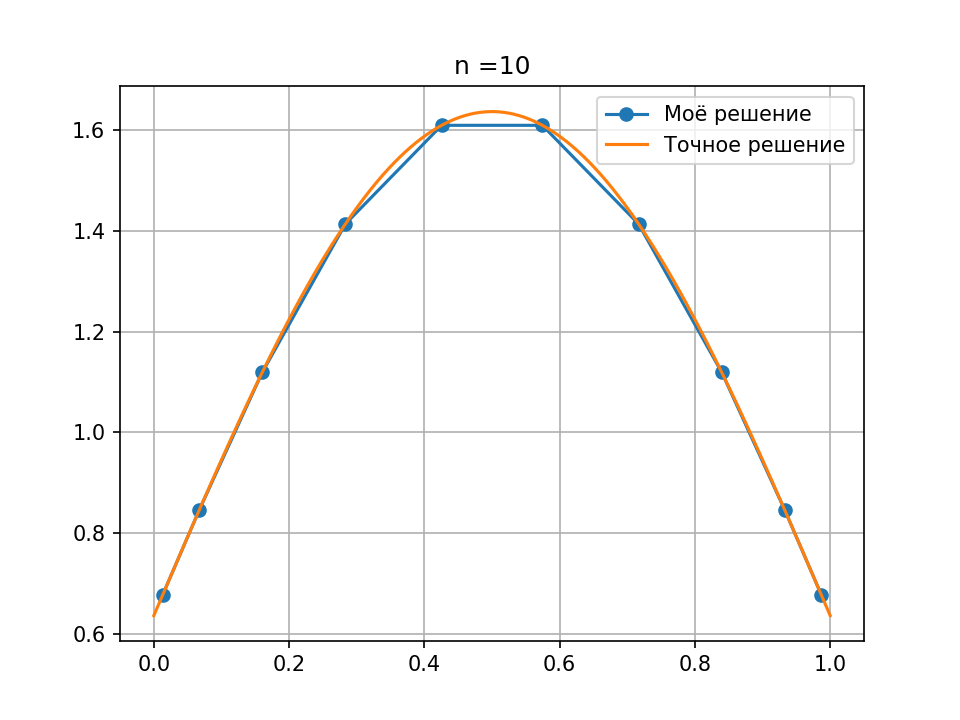

<IPython.core.display.Javascript object>


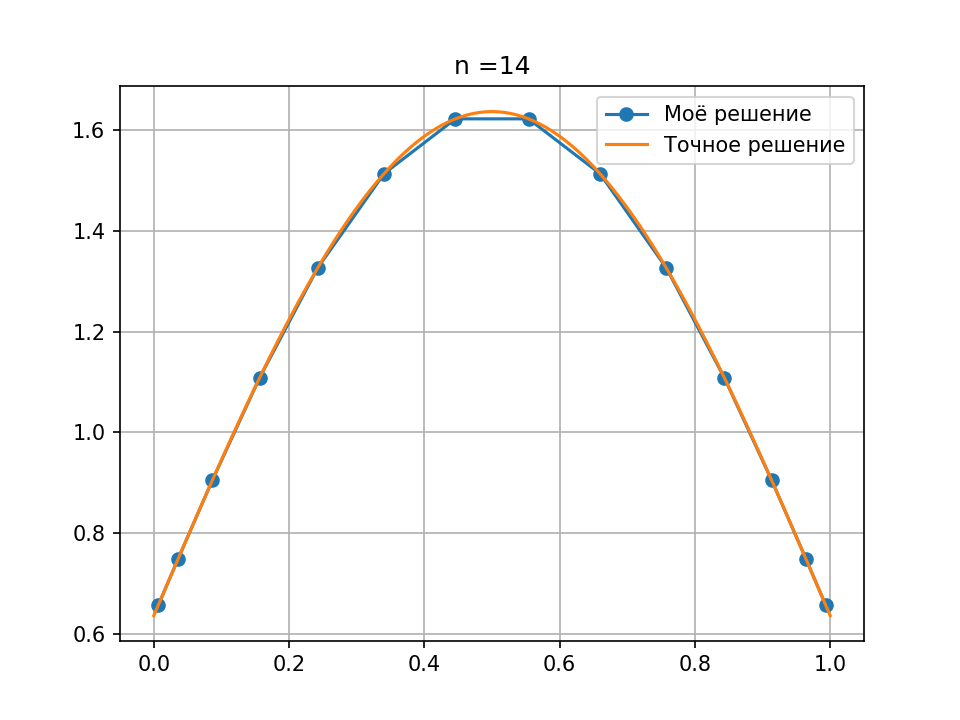

<IPython.core.display.Javascript object>


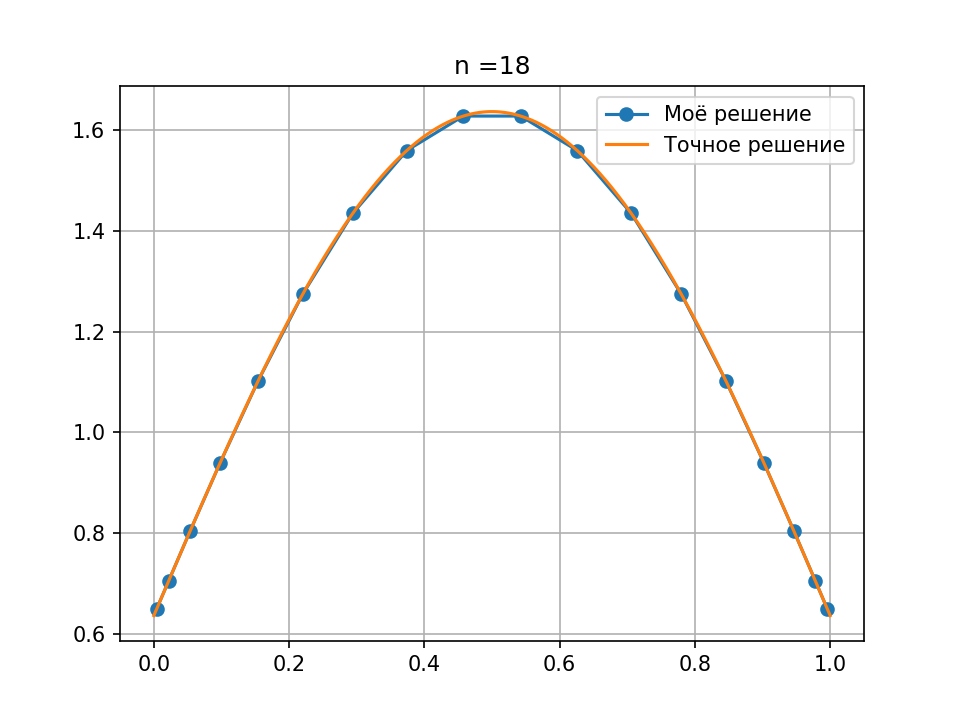

<IPython.core.display.Javascript object>


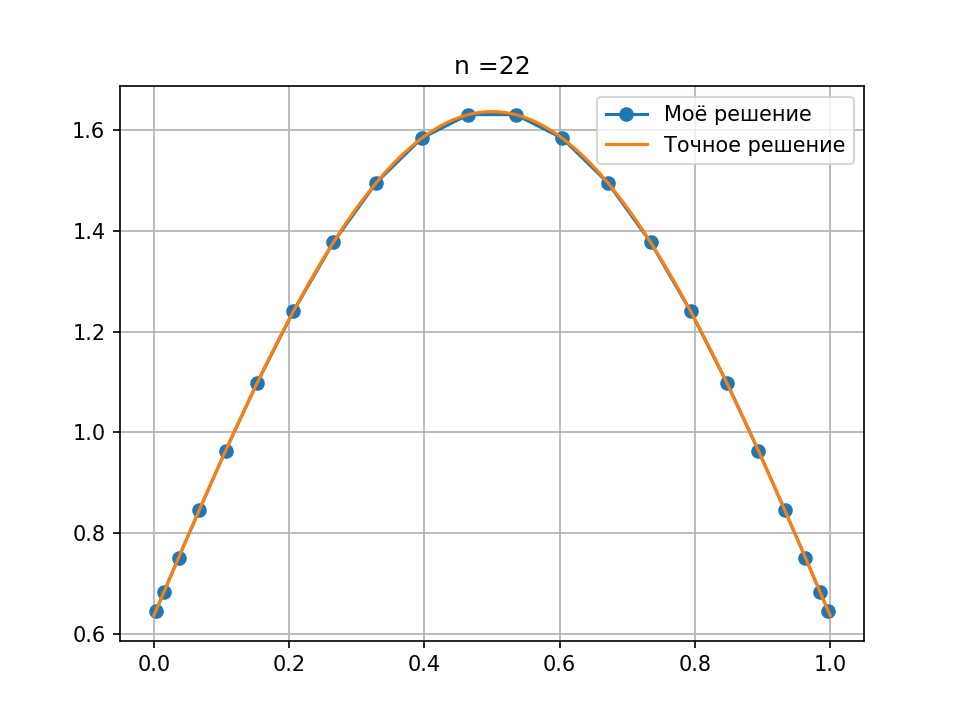

<IPython.core.display.Javascript object>


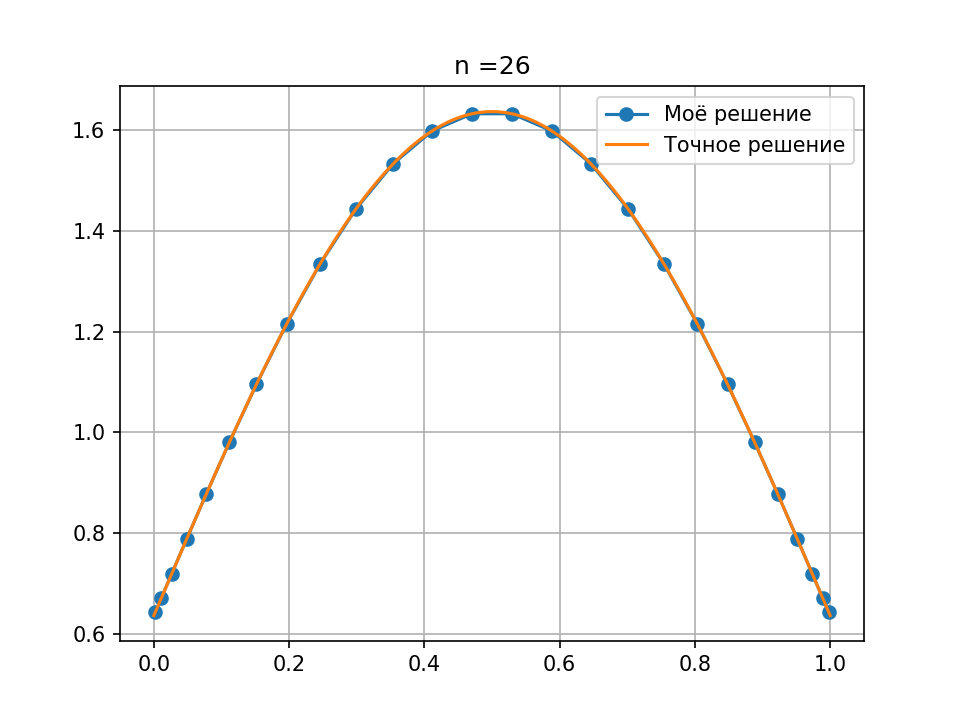

<IPython.core.display.Javascript object>


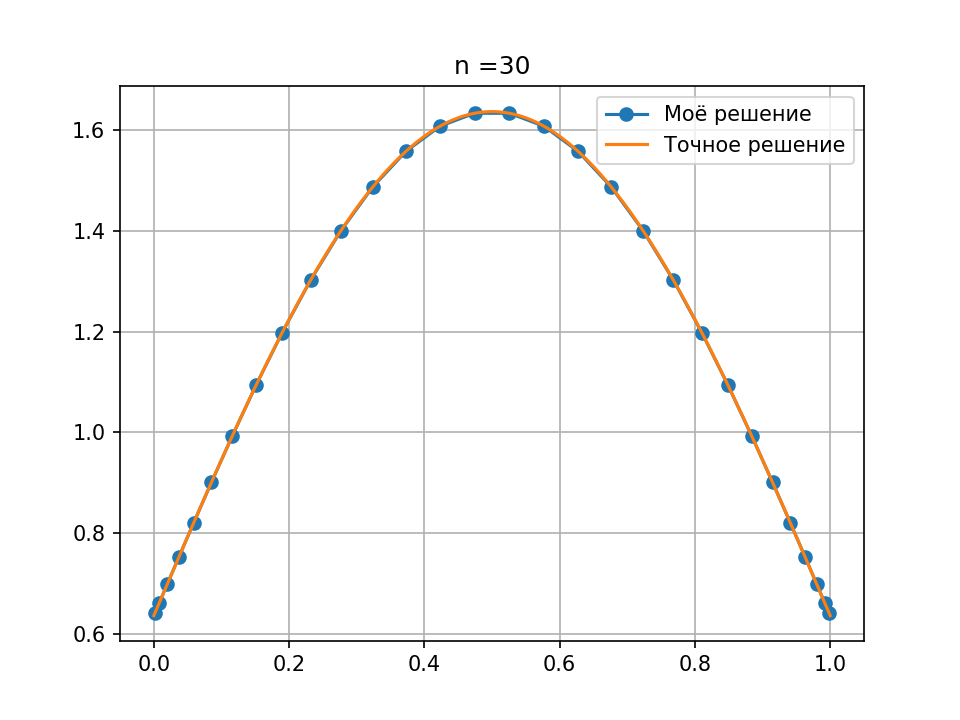

<IPython.core.display.Javascript object>


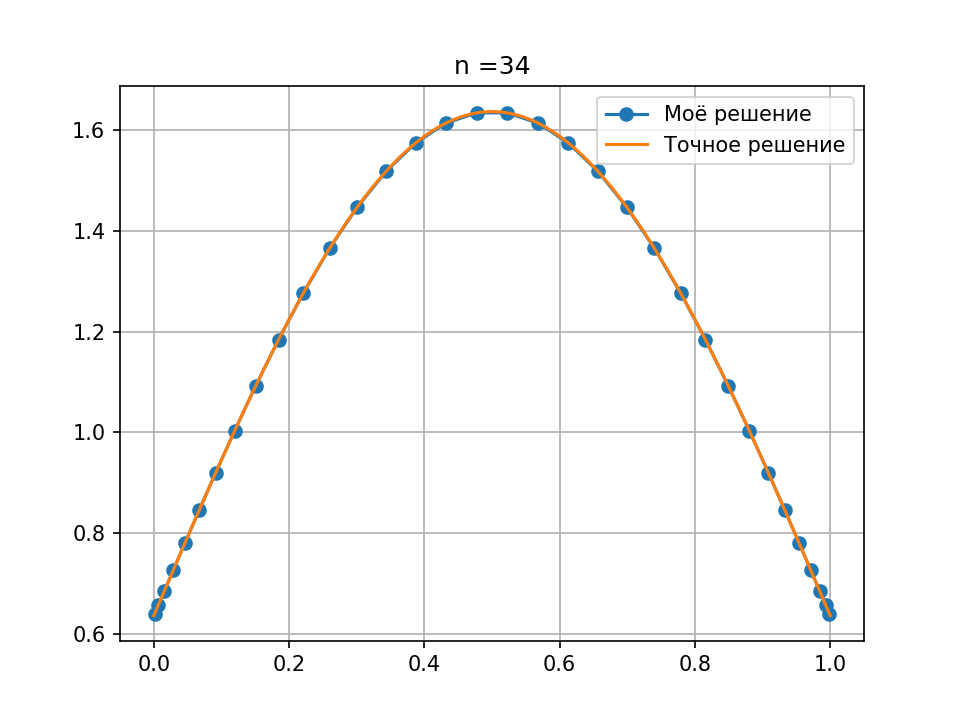

<IPython.core.display.Javascript object>


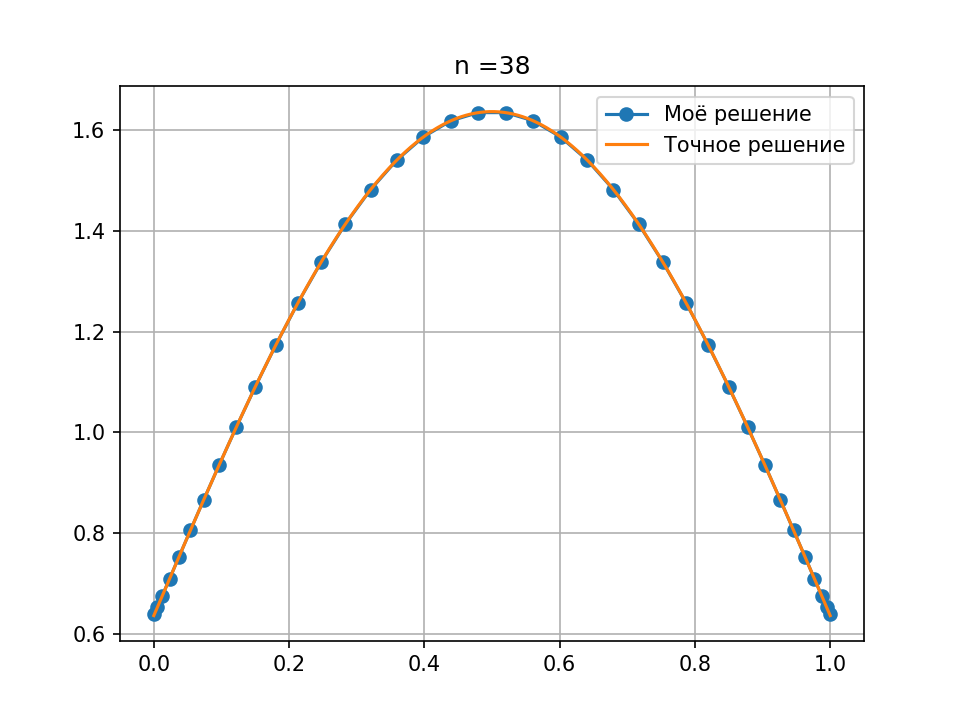

<IPython.core.display.Javascript object>


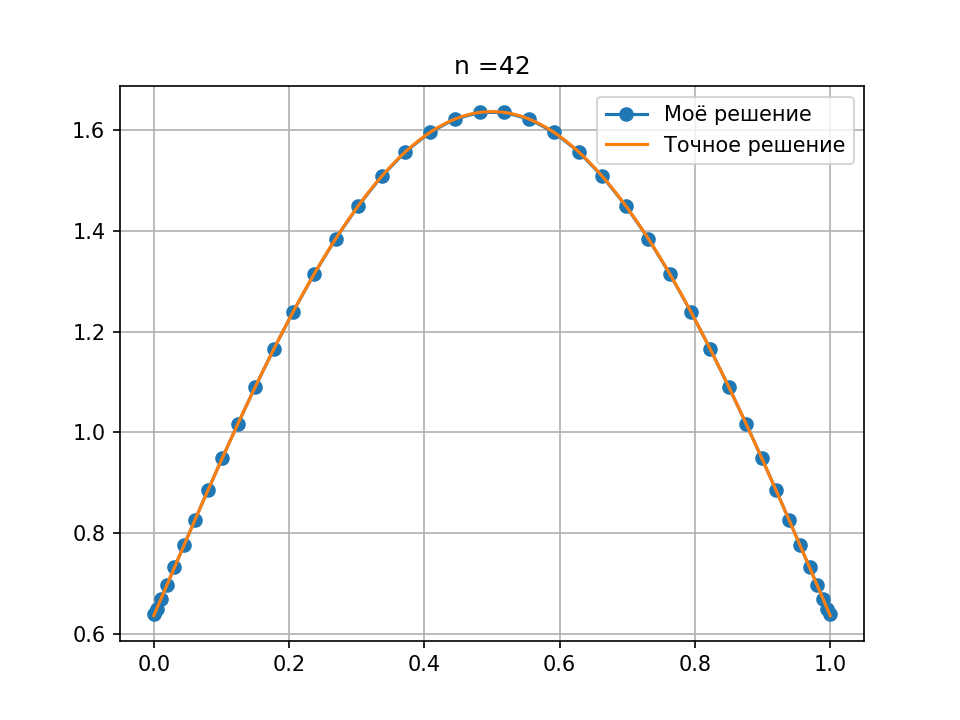

<IPython.core.display.Javascript object>


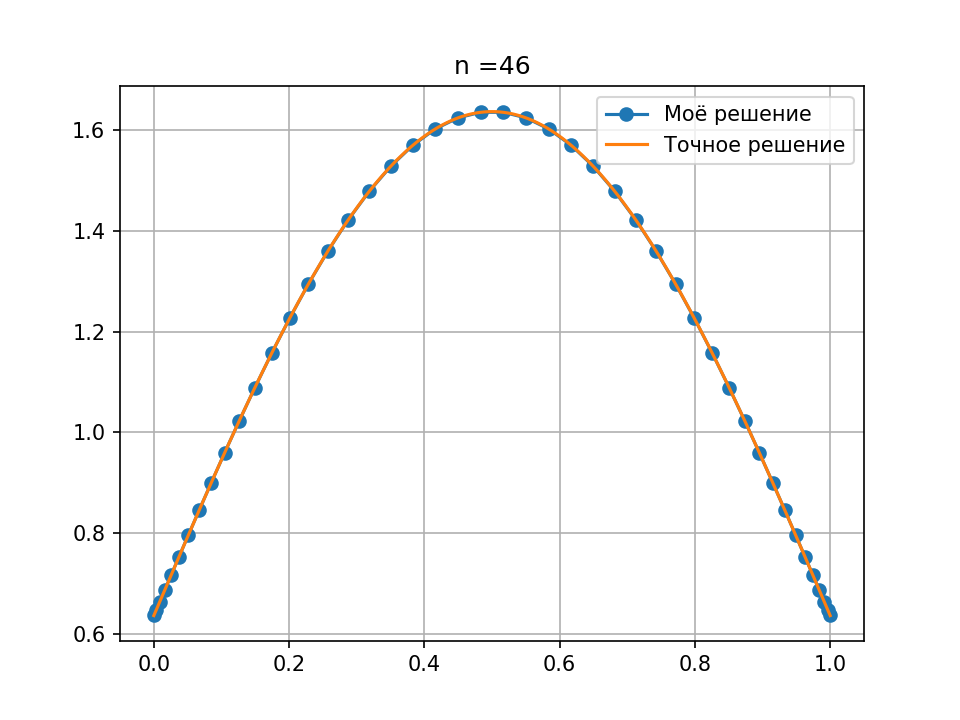

In [18]:
### Напишите код здесь нихачу
%matplotlib notebook
from scipy.special import roots_sh_legendre
import matplotlib.pyplot as plt

f_naw_naw = lambda x: - np.sin(np.pi*x) 
x_pravilnaya = np.linspace(0, 1, 1000)
f_pravilnaya = np.sin(np.pi * x_pravilnaya) + 2/np.pi
for i in range(10, 50, 4):
    x, w = roots_sh_legendre(i)
    w_mat = np.zeros((i, i))
    for k in range(i):
        w_mat[k, :] = w
    f = np.linalg.solve(0.5*w_mat - np.eye(i), f_naw_naw(x))  
    plt.figure('n =' + str(i))
    plt.title('n =' + str(i))
    plt.plot(x, f, 'o-', label = 'Моё решение')
    plt.plot(x_pravilnaya, f_pravilnaya, label = 'Точное решение')
    plt.legend()
    plt.grid()

На графиках видно, что после n = 30 всё уже достаточно точно.

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

<IPython.core.display.Javascript object>


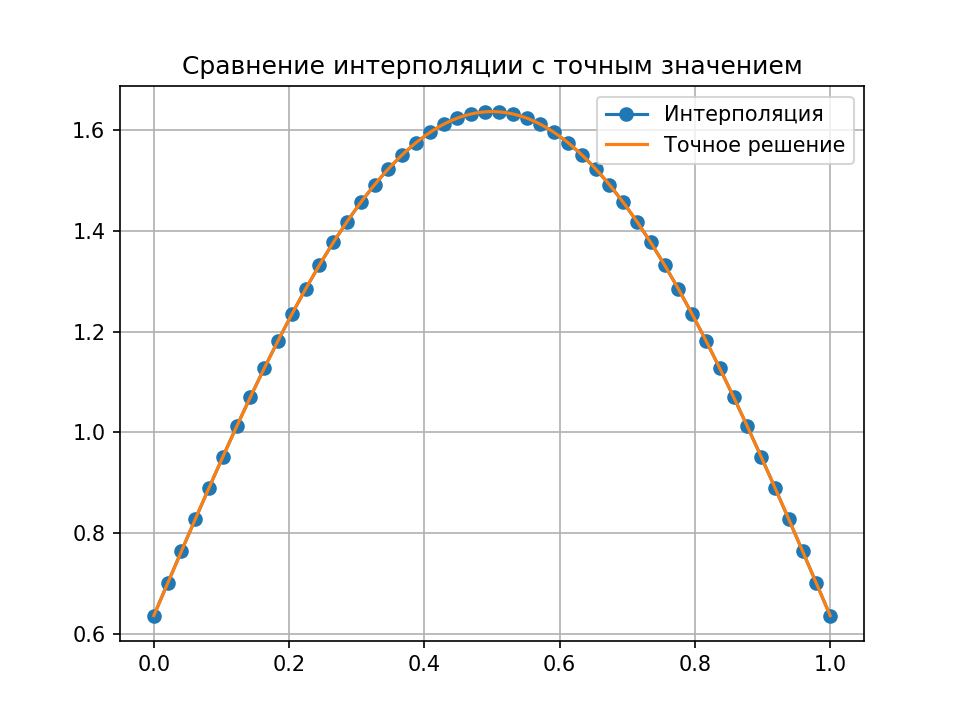

In [23]:
from scipy.interpolate import  KroghInterpolator 
i = 10
x, w = roots_sh_legendre(i)
w_mat = np.zeros((i, i))
for k in range(i):
    w_mat[k, :] = w
f = np.linalg.solve(0.5*w_mat - np.eye(i), f_naw_naw(x))  
x_f = np.linspace(0, 1, 50)
f_nuw_nuw = KroghInterpolator(x, f)
plt.figure()
plt.plot(x_f, f_nuw_nuw(x_f), 'o-', label = 'Интерполяция')
plt.plot(x_pravilnaya, f_pravilnaya, label = 'Точное решение')
plt.legend()
plt.title('Cравнение интерполяции с точным значением')
plt.grid()


2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

<IPython.core.display.Javascript object>


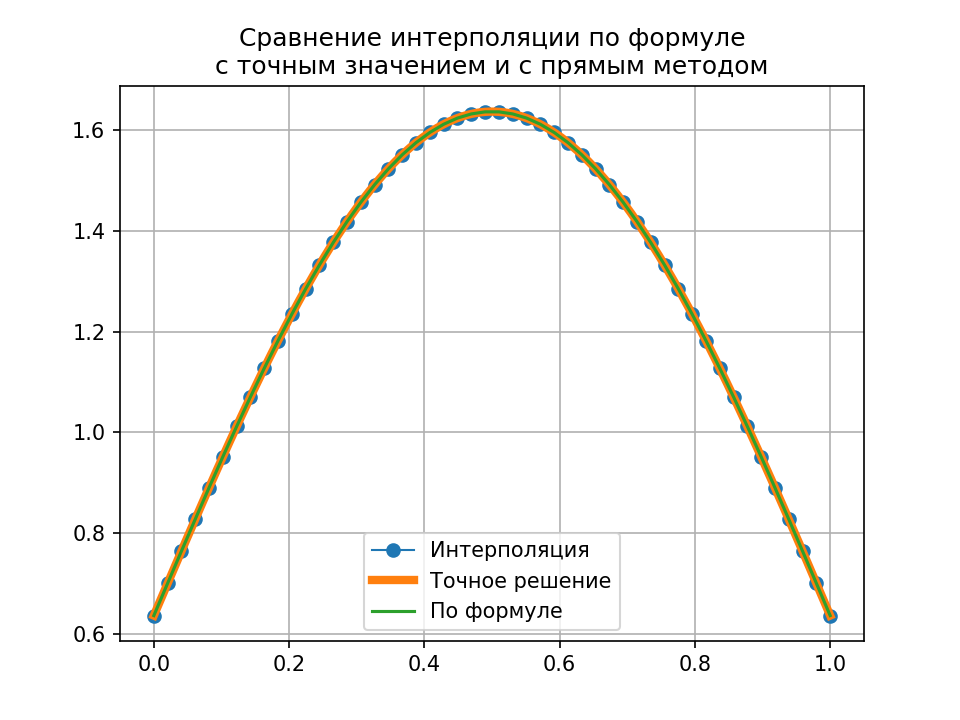

In [30]:
f_volk = np.sin(np.pi*x_f) + 0.5 * sum(w*f)

plt.figure()
plt.plot(x_f, f_nuw_nuw(x_f), 'o-', lw = 1, label = 'Интерполяция')
plt.plot(x_pravilnaya, f_pravilnaya, lw = 4, label = 'Точное решение')
plt.plot(x_f, f_volk, label = 'По формуле')
plt.legend()
plt.title('Cравнение интерполяции по формуле\nс точным значением и с прямым методом')
plt.grid()

Ну как-то так